# Table5. Canal closure and rebellions: north versus south


In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [3]:
adopath ++ "/Users/chengjun/Library/Application Support/Stata/ado/plus/"


  [1]              "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [2]  (BASE)      "/Applications/Stata/ado/base/"
  [3]  (SITE)      "/Applications/Stata/ado/site/"
  [4]              "."
  [5]  (PERSONAL)  "/Users/chengjun/Documents/Stata/ado/personal/"
  [6]  (PLUS)      "/Users/chengjun/Library/Application Support/Stata/ado/plus/"
  [7]  (OLDPLACE)  "~/ado/"
  [8]              "/opt/anaconda3/lib/python3.8/site-packages/stata_kernel/ado"


In [4]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"



In [5]:
gen intlat=Y_COORD if along_oldhuang==1&alongcanal==1
egen intersectlat=min(intlat)
gen north=(Y_COORD>intersectlat)
gen northpost=north*reform
gen triple=alongcanal*reform*north
label variable northpost "$ North \times Post $"
label variable triple " $ Along Canal \times Post \times North $ "
global X triple interaction1 northpost


(149,340 missing values generated)









In [6]:
*** Main estimates
reghdfe $Y $X, absorb(i.OBJECTID i.year) cluster(OBJECTID)
eststo est1
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est1
estadd scalar N_g=groups:est1

reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year) cluster(OBJECTID)
eststo est2
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est2
estadd scalar N_g=groups:est2

reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) cluster(OBJECTID)
eststo est3
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est3
estadd scalar N_g=groups:est3

reghdfe $Y $X, absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) cluster(OBJECTID)
eststo est4
qui tab OBJECTID if e(sample)
scalar groups=r(r)
qui su $Y if e(sample)
scalar ymean=r(mean)
estadd scalar depavg=ymean:est4
estadd scalar N_g=groups:est4


(MWFE estimator converged in 2 iterations)

HDFE Linear regression                            Number of obs   =    140,432
Absorbing 2 HDFE groups                           F(   3,    535) =      13.29
Statistics robust to heteroskedasticity           Prob > F        =     0.0000
                                                  R-squared       =     0.0318
                                                  Adj R-squared   =     0.0263
                                                  Within R-sq.    =     0.0013
Number of clusters (OBJECTID) =        536        Root MSE        =     0.3846

                             (Std. err. adjusted for 536 clusters in OBJECTID)
------------------------------------------------------------------------------
             |               Robust
ash~ypop1600 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      triple |   .0990709   .0273818     3.62   0

In [7]:
*** Get indicators of FEs
estfe est1 est2 est3 est4


In [8]:
*** Get Conley standard errors
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est1 
restore
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est2
restore
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est3
restore
preserve
hdfe $Y $X, clear absorb(i.OBJECTID i.year c.ashprerebels#i.year i.provid#i.year i.prefid#c.year) tol(0.001) keepvars(OBJECTID year Y_COORD X_COORD)
ols_spatial_HAC $Y $X, lat(Y_COORD) lon(X_COORD) time(year) panel(OBJECTID) distcutoff(500) lagcutoff(262) disp star
matrix V_spat=vecdiag(e(V)) 
matmap V_spat SE_spat, m(sqrt(@)) 
estadd matrix sesp=SE_spat: est4
restore



(cachevars: year OBJECTID)
(converged in 3 iterations)

 
OLS REGRESSION
 
SE CORRECTED FOR CROSS-SECTIONAL SPATIAL DEPENDANCE
             AND PANEL-SPECIFIC SERIAL CORRELATION
 
DEPENDANT VARIABLE: ashonset_cntypop1600
INDEPENDANT VARIABLES:  triple interaction1 northpost
 
SPATIAL CORRELATION KERNAL CUTOFF: 500 KM
SERIAL CORRELATION KERNAL CUTOFF: 262 PERIODS
------------------------------------------------------------------------------
ashonse~1600 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      triple |   .0990709   .0287425     3.45   0.001     .0427361    .1554057
interaction1 |  -.0143699   .0119271    -1.20   0.228    -.0377467    .0090069
   northpost |   .0281818    .009822     2.87   0.004     .0089309    .0474326
------------------------------------------------------------------------------
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL

-------------+---------------------------------
      triple |    0.069      0.069      0.069  
             |    0.015      0.024      0.028  
             |    4.482      2.817      2.475  
interaction1 |    0.002      0.002      0.002  
             |    0.012      0.011      0.011  
             |    0.166      0.182      0.188  
   northpost |    0.022      0.022      0.022  
             |    0.013      0.024      0.026  
             |    1.737      0.920      0.838  
-------------+---------------------------------
           N |   140432     140432     140432  
          r2 |    0.000      0.000      0.000  
-----------------------------------------------
                                 Legend: b/se/t
 
STANDARD ERRORS UNDER OLS, WITH SPATIAL CORRECTION AND WITH SPATIAL AND SERIAL C
> ORRECTION:

-----------------------------------------------------
    Variable |    OLS        spatial      spatHAC    
-------------+---------------------------------------
      triple |   0.06

In [9]:
**************************************************************************
*** Set up table elements for Latex
**************************************************************************
*** Title
global caption "Canal closure and rebellions: north versus south"

*** Table head
#delimit ;
global head
    \begin{table}[htb]\centering
    \caption{$caption } \begin{threeparttable}
	\begin{tabular}{l*{4}{c}}
	\toprule\toprule
	&\multicolumn{4}{c}{Dependent Variable: Rebellions } \\
	[.1cm]\cmidrule(lr){2-5}
	;
#delimit cr
*** Table notes
run "Program/Analysis/generalnotes.do"
global note_oldhuang "The northern and southern parts are defined by the canal's intersection with the old course of the Yellow River. $ North $ is an indicator of whether a county is located north to the old course of the Yellow River. "
global notes "\begin{tablenotes}\footnotesize{\item \textit{Note.} $note_sample $note_dep $note_along $note_post $note_oldhuang $note_std $note_conley }\end{tablenotes}"


In [10]:
**************************************************************************
*** Export Table to Latex
**************************************************************************
esttab est1 est2 est3 est4 ///
	   using "Results/Tables/table5.tex", booktabs nonotes compress label nomtitles ///
                                   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
							       collabels("",none) ///
                                   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
								   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
    							   prehead($head ) ///
                                   postfoot(\bottomrule\end{tabular}$notes\end{threeparttable}\end{table}) ///
                                   $stars ///
                                   replace


(file Results/Tables/table5.tex not found)
(output written to Results/Tables/table5.tex)


In [11]:
esttab est1 est2 est3 est4, ///
   cells(b(fmt(4)) se(fmt(4) par(( ))) sesp(fmt(4) par([ ]) drop(_cons))) ///
   collabels("",none) ///
   stats(depavg N N_g r2_a,fmt(4 %7.0fc 0 4) labels("Mean of the Dependent Variable" "No. of Observations" "No. of Counties" "Adjusted R-squared")) ///
   indicate("County FE =0.OBJECTID" "Year FE=0.year" "Pre-reform rebellion $\times$ Year FE=0.year#c.ashprerebels" "Province $\times$ Year FE=0.provid#0.year"  "Prefecture Year Trend=0.prefid#c.year") ///
   prehead($head ) ///
   postfoot($notes) ///
   $stars ///
   replace


\begin{table}[htb]\centering     \caption{Canal closure and rebellions: north ve
> rsus south } \begin{threeparttable}  \begin{tabular}{l*{4}{c}}  \toprule\topru
> le  &\multicolumn{4}{c}{Dependent Variable: Rebellions } \\  [.1cm]\cmidrule(l
> r){2-5} 
                      (1)          (2)          (3)          (4)
             ash~ypop1600 ash~ypop1600 ash~ypop1600 ash~ypop1600
----------------------------------------------------------------
triple             0.0991       0.0998       0.0907       0.0687
                 (0.0274)     (0.0284)     (0.0286)     (0.0279)
                 [0.0287]     [0.0291]     [0.0284]     [0.0277]
interaction1      -0.0144      -0.0144      -0.0065       0.0020
                 (0.0092)     (0.0092)     (0.0105)     (0.0095)
                 [0.0119]     [0.0119]     [0.0113]     [0.0106]
northpost          0.0282       0.0281       0.0197       0.0221
                 (0.0083)     (0.0083)     (0.0221)     (0.0245)
                 [0.0098]     

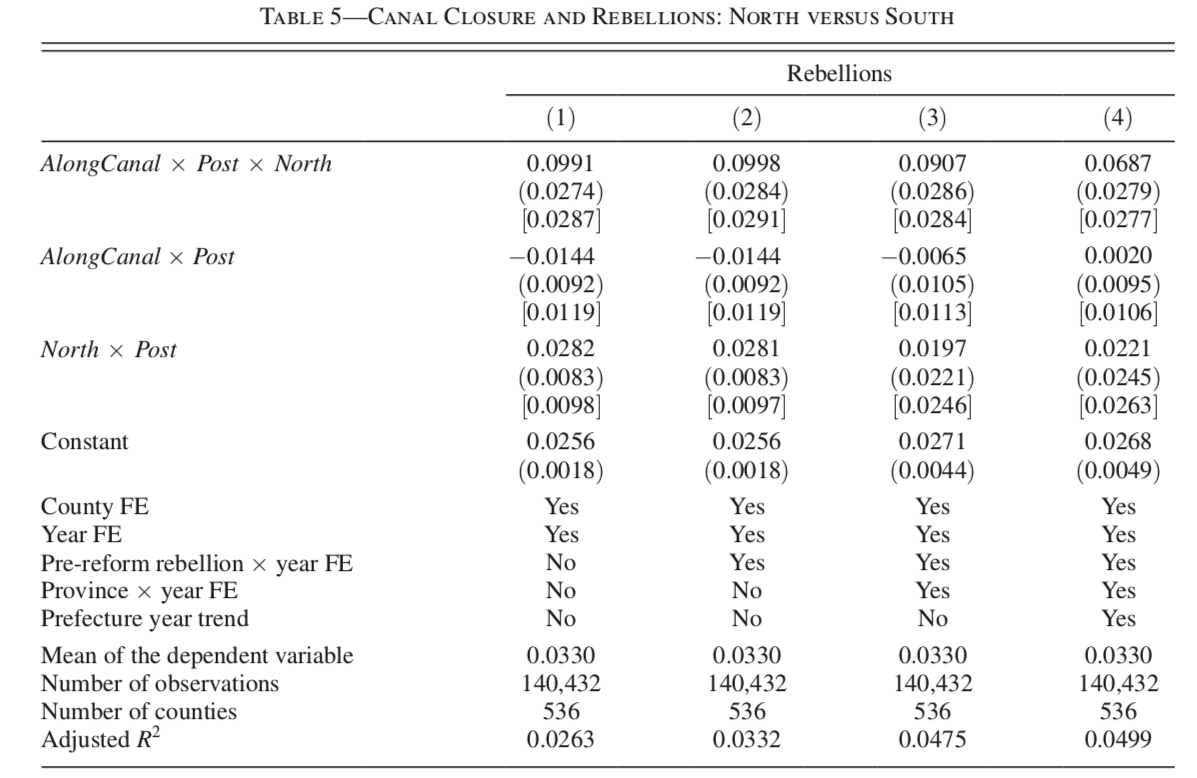